# 1D Random Walk

## Import libraries

In [3]:
import numpy as np #handles arrays 
import matplotlib.pyplot as plt #for plotting (basic)
import seaborn as sns #also for plotting 
from IPython.display import display, Latex #for formatting print
from IPython.display import Markdown as md #for formatting print
import random #for choosing direction randomly
from joblib import Parallel, delayed, parallel_backend #for parallel looping

In [5]:
# Random generator of numpy 
rng = np.random.default_rng()

## Simulation of a single simple random walker in 1D

### Start with 1 value of number of steps

In [31]:
#define the parameters of the problem
n_steps=100 #number of steps 
n_walkers=1 #number of walkers
S_0=5

#### Method 1: 
Loop over # of steps (100 in this case) and in each iteration generate a step to the left (-1) or a step to the right (+1)

#### Method 2: 
Generate all 100 steps (in this case) at once: 

rng.integers(low, high=None, size=None) allows us to generate 'size' amount of integers from [low, high). 

If we do low=-1, and high=1 we will also generate 0s. 

To overcome this we will generate 1s and 2s and then convert them to -1 and +1

## Method 1: generate one step at a time

In [37]:
#define the possible directions for each step
left, right=[-1, 1] #moving left will advance the walker by -1; moving to the right will advance the walker by +1
all_directions=[left, right] #we will choose either left or right 

In [65]:
#In the problem presented here, we aren't required to continue the trajectory until reaching a certain point, but rather continue until a certain number of steps
# We will use a for loop

#first create the array S_n, where element(index) i is the location of the walker after i steps 
S_n=np.zeros(n_steps)
#we start at S_0, and advance from there
S_n[0] = S_0 
for i in range(1,n_steps): #add location for all the other steps 
    S_n[i] = S_n[i-1] +random.choice(all_directions) #we will choose either direction randomly and advance accordingly from our location

#### Lets say you want to generate steps until reaching a certain boundary, for example generate steps until reaching x=0, how does your script change?
#### Hint: one approach is a while loop, that continues to add trajectories until reaching said condition, however for the infinite 1D line the loop might take a substantial amount of time (even with parallel looping). Its more advisable to have a cutoff for a certain maximum amount of steps (say 1e6 steps), and to stop the loop when reaching the condition using "break". 

## Method 2: generate many steps at once

In [39]:
#Step 1: generate random integers 1 or 2
# The number of integers we need to generate is n_steps*n_walkers 
# by specifying size=(n_simu,n_step) we ask to generate integers in form of a matrix, where each row is a walker and each column is a step
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#### Find S_n

In [40]:
S_n = S_0+np.cumsum(steps,1) 
# S_n is a matrix where each row is a walker, and the columns represent the location.
# For example: row 0 and column 322 is the first walker and its location after 323 steps. 

# Notice! No boundary or geometrical properties of the problem were implemented yet. 

#### What is np.cumsum? 
np.cumsum(steps,1)  cumulatively sums over the steps. For example, if steps=[-1,1,1,1] then np.cumsum(steps) = [-1,  0,  1,  2]

Since: np.cumsum(steps) = [-1 = -1,  -1+1=0,  -1+1+1= 1, -1+1+1 = 2]

<br>

The '1' after the comma specific if we perform the cumsum over the columns or the rows. For 0 we cumulatively sum over values in all the rows (for each separate column) and for 1 we cumulatively sum over values in all the columns (for each separate row).

Let us take an example: 
Do we sum over all the values in the first row (which is the first walker), i.e. over all the columns (or steps) of the first row (walker), and repeat the process for each row (walker)? 

OR 

Do we sum over all the values in the first column (which is the first step), i.e. over all the rows (or walkers) of the first column (step), and repeat the process for each column (step)?

#### Example

In [41]:
#to understand cumsum better we will look at an example 
example_array=np.array([[-1,1,1,1], [1,1,1,-1], [-1,1,1,-1]])
example_array

array([[-1,  1,  1,  1],
       [ 1,  1,  1, -1],
       [-1,  1,  1, -1]])

In [42]:
np.cumsum(example_array, axis=0) # sum over all the rows, for each separate column

array([[-1,  1,  1,  1],
       [ 0,  2,  2,  0],
       [-1,  3,  3, -1]])

In [43]:
np.cumsum(example_array, axis=1) # sum over all the columns, for each separate row

array([[-1,  0,  1,  2],
       [ 1,  2,  3,  2],
       [-1,  0,  1,  0]])

## Plot trajectory

Using either methods (1 or 2) plot the trajectory of a single walker 

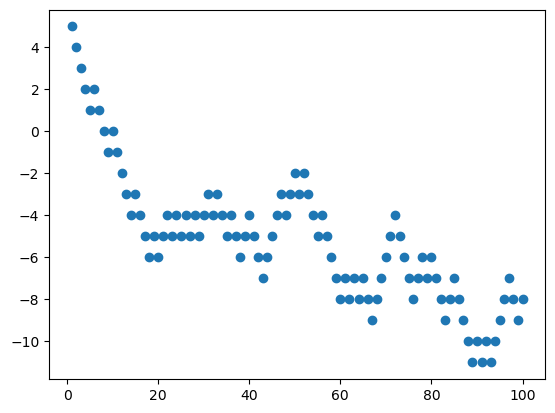

In [67]:
x_array=np.arange(1,n_steps+1) #our x-axis is the steps (first step, second step, etc) 
plt.scatter(x_array,S_n) #plot to get a feeling of what we should get

Text(0, 0.5, 'Location of Walker ($S_n$)')

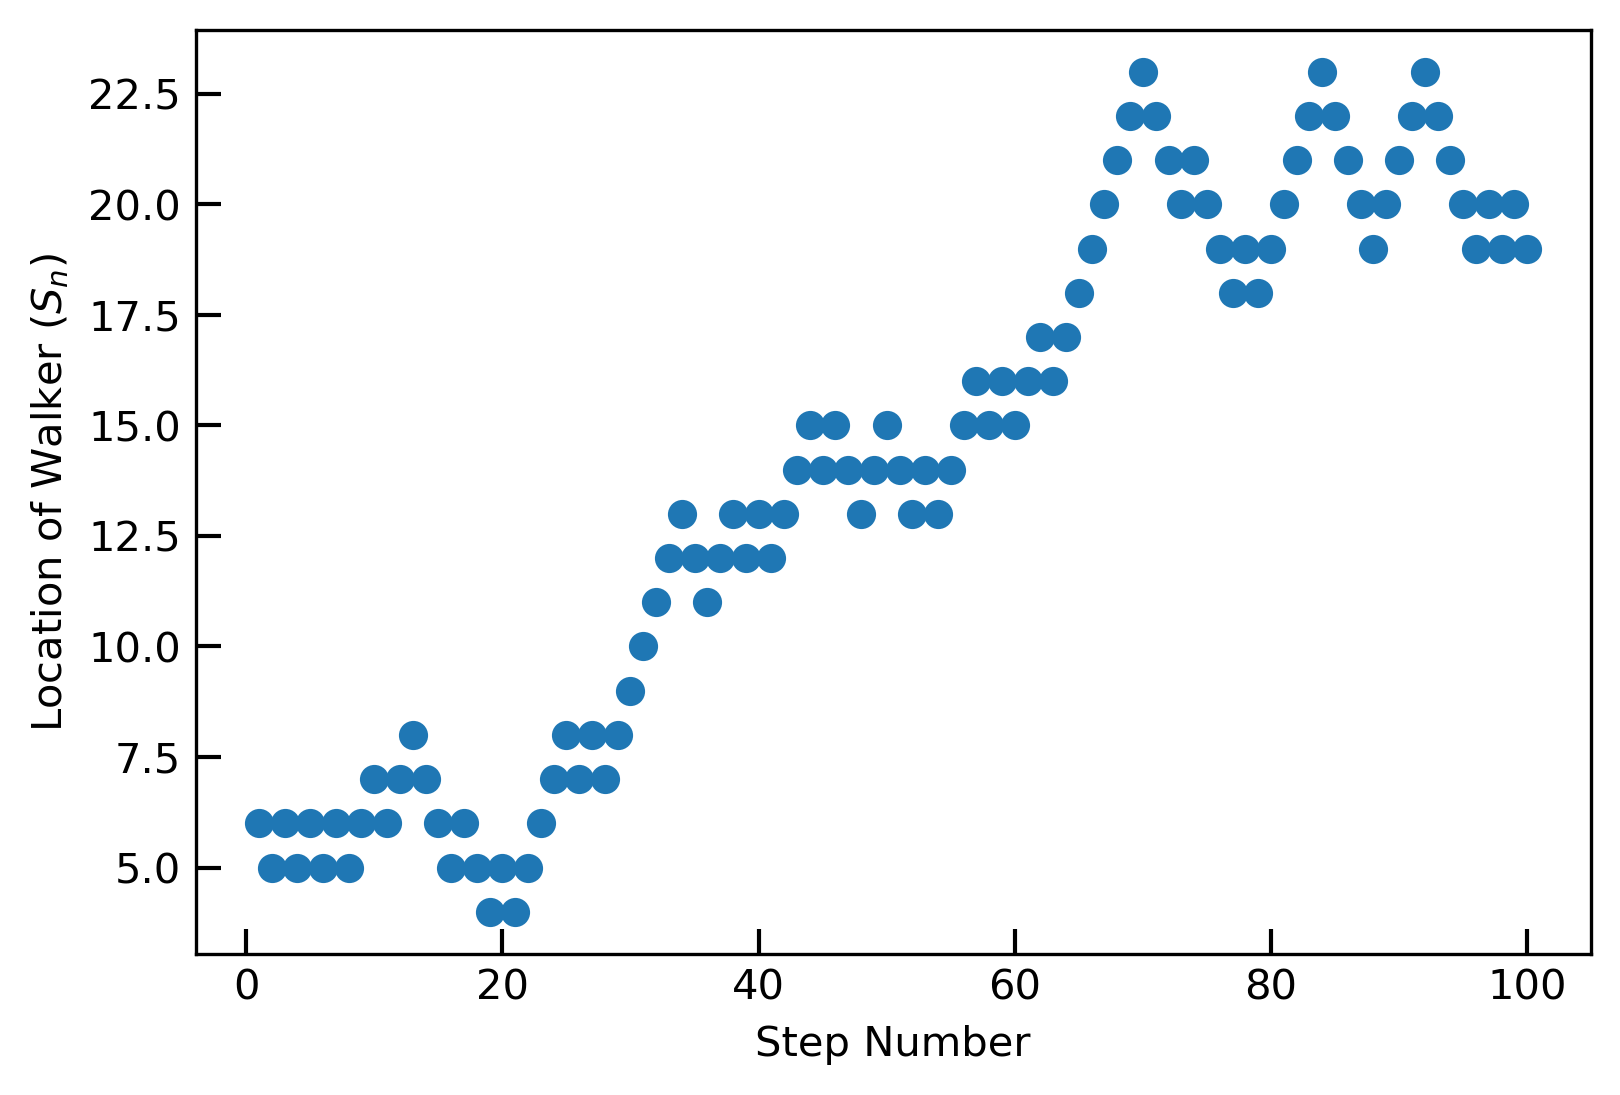

In [32]:
#format your plot 
row_num, col_num=1,1
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)


ax.scatter(x_array,S_n)
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1)
ax.set_xlabel('Step Number')
ax.set_ylabel(r'Location of Walker ($S_n$)')

## Repeat above for all # of steps

In [78]:
#define the parameters of the problem
n_steps=[100, 1000, 10000, 100000] #number of steps 
n_walkers=1 #number of walkers
S_0=5

## Method 1: generate one step at a time

In [79]:
#define the possible directions for each step
left, right=[-1, 1] #moving left will advance the walker by -1; moving to the right will advance the walker by +1
all_directions=[left, right] #we will choose either left or right 

In [82]:
#create a variable to save the S_n of a single walker for each # of steps 
S_ns={} #I will choose a dictionary, but you can choose a numpy array, or a list, whatever is convenient for you
for n_step in n_steps: 
    #first create the array S_n, for each n where element(index) i is the location of the walker after i steps 
    S_ns[n_step]=np.zeros(n_step)
    #we start at S_0, and advance from there    
    S_ns[n_step][0]=S_0 
    for i in range(1,n_step):
        S_ns[n_step][i] = S_ns[n_step][i-1] +random.choice(all_directions) #we will choose either directions randomly and advance accordingly from our location

## Method 2: generate many steps at once

In [35]:
#create a variable to save the S_n of a single walker for each # of steps 
S_ns={} #I will choose a dictionary, but you can choose a numpy array, or a list, whatever is convenient for you
for n_step in n_steps:
    #Step 1: generate random integers 1 or 2
    simu= rng.integers(1,3, (n_walkers,n_step)) #notice n_steps changed to n_step
    
    #Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
    steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

    #find S_n
    S_n = S_0+np.cumsum(steps,1) 
    S_ns[n_step]=S_n

## Plot trajectory

Using either methods we will plot the trajectories for each number of steps 

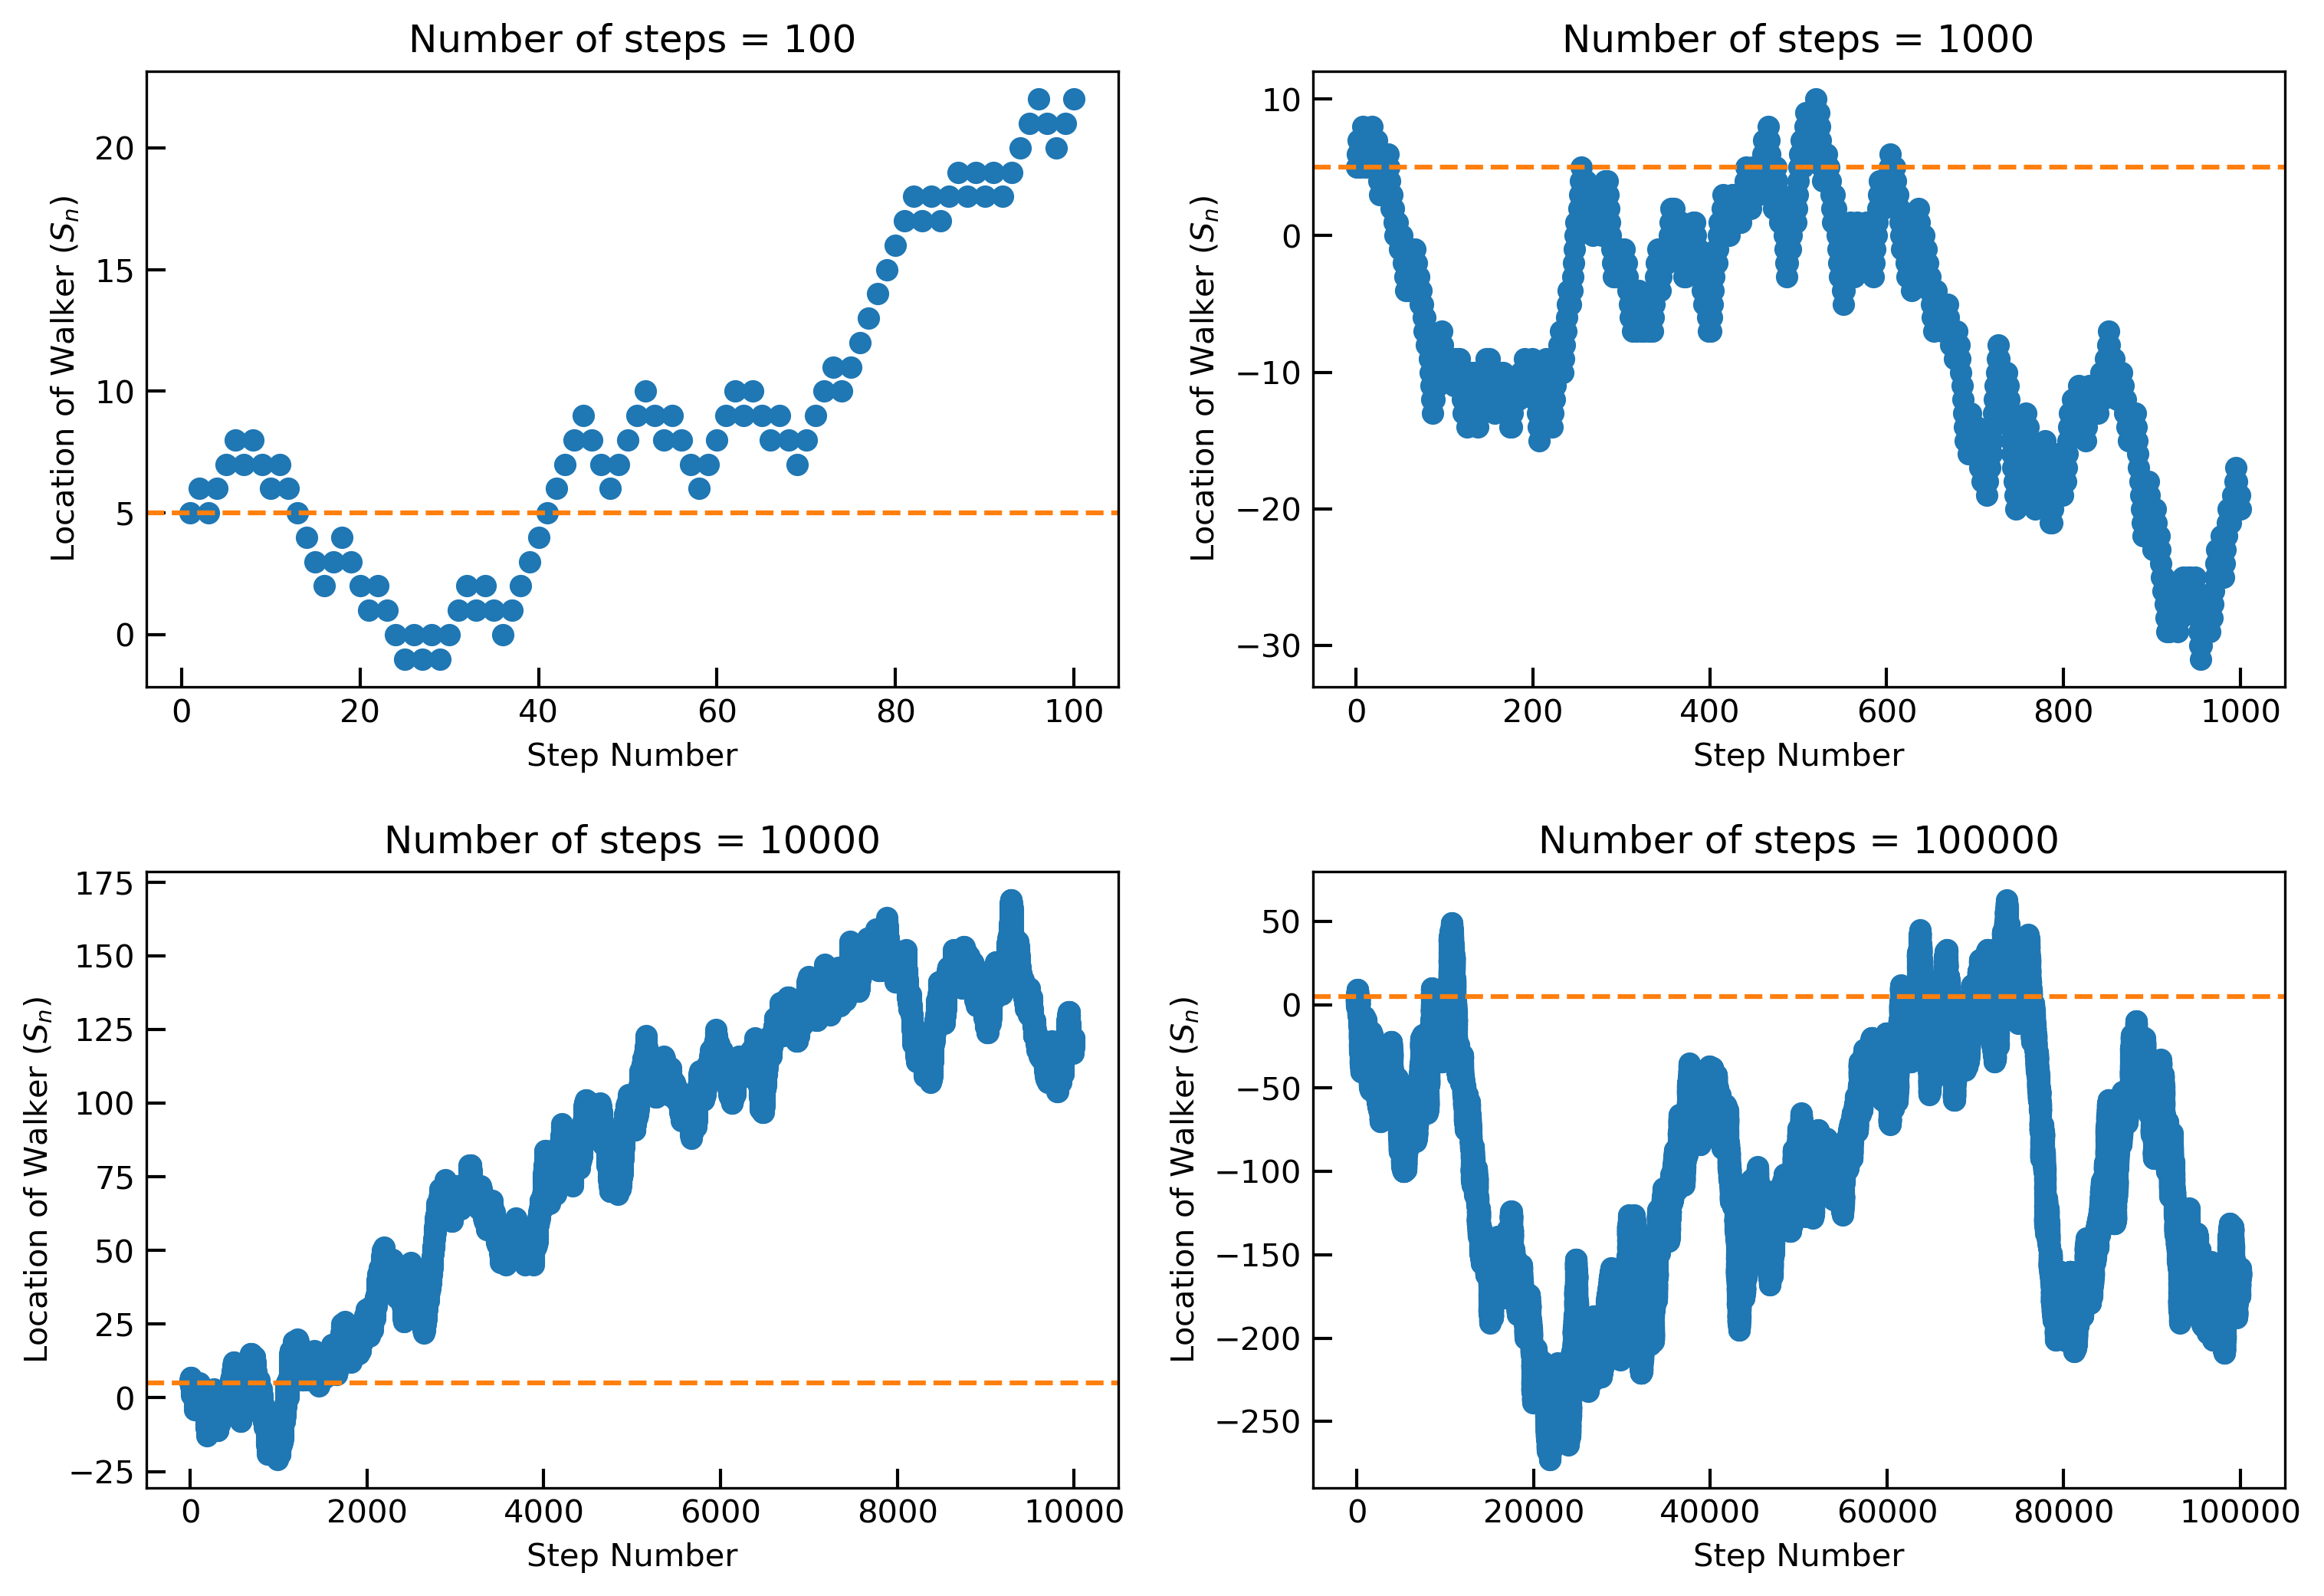

In [76]:
#plot the trajectories for each # of steps 

row_num, col_num=2,2
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)

axs=ax.ravel()

for i, n_step in enumerate(n_steps):
    #define the x_array for each # of steps
    x_array=np.arange(1,n_step+1)
    S_n=S_ns[n_step]
    axs[i].scatter(x_array,S_n)
    axs[i].tick_params(axis='both', which='major', direction='in', length=6, width=1)
    axs[i].set_xlabel('Step Number')
    axs[i].set_ylabel(r'Location of Walker ($S_n$)')
    axs[i].set_title('Number of steps = %d'%n_step)
    #add a horizontal line at y=S_0 to illustrate the return of the walker back to the origin 
    axs[i].axhline(y=S_0, linestyle='dashed', color='tab:orange')

fig.subplots_adjust(hspace=0.3)

## Simulation of 1 million simple random walkers in 1D

In [34]:
#define the parameters of the problem
n_steps=100 #number of steps 
n_walkers=1000000 #number of walkers
S_0=5

## Method 1: generate one step at a time

In [15]:
#define the possible directions for each step
left, right=[-1, 1] #moving left will advance the walker by -1; moving to the right will advance the walker by +1
all_directions=[left, right] #we will choose either left or right 

##### Note that in this method, due to the double loop (loop over the walkers, and over the steps) the compilation may be slow 
##### A solution to this is to use parallel looping (see at the end)
##### For now we will present the iterative looping

In [38]:
#first create the array S_n, where element(index) i is the location of the walker after i steps 
#this time S_n will be 2D: each column i is still the location of walker after i steps, and each row j is walker no. j
S_n=np.zeros((n_walkers,n_steps))
#all walkers start at S_0, and advance from there
S_n[:, 0] = S_0 
for j in range(n_walkers): #repeat the process described above for each walker 
    for i in range(1,n_steps): #add location for all the other steps 
        S_n[j,i] = S_n[j, i-1] +random.choice(all_directions) #we will choose either direction randomly and advance accordingly from our location

## Method 2: generate many steps at once

In [6]:
#Step 1: generate random integers 1 or 2
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#Step 3: find S_n
S_n = S_0+np.cumsum(steps,1) 

## Find the mean

In [39]:
mean_Sn=np.mean(S_n[:, -1])
display(Latex('The expected value of $S_{n}$ is %f'%mean_Sn)) #formatting printing (took from https://stackoverflow.com/questions/4028267/how-to-render-latex-markup-using-python)

<IPython.core.display.Latex object>

In [47]:
md(f"###  The analytical expected value is S_0, which in our case is 5, and so the numerical evaluation {mean_Sn} matches our analytical value.")

###  The analytical expected value is S_0, which in our case is 5, and so the numerical evaluation 5.004406 matches our analytical value.

## Find the mean square displacement

In [40]:
msd = np.mean((S_n[:, -1]-S_0)**2)
display(Latex('The mean square displacement of $S_{n}$ is %f'%msd))

<IPython.core.display.Latex object>

In [46]:
md(f"###  The analytical msd is n, which in our case is 100, and so the numerical evaluation {msd} matches our analytical value.")

###  The analytical msd is n, which in our case is 100, and so the numerical evaluation 98.927048 matches our analytical value.



####

## Method 1: With Parallel Looping

In [8]:
#First, we define the function which we loop over in parallel 
def random_walk_1d_infinite_line(index, n_steps, S_0):
    np.random.seed(index) #due to the parallelization process used in joblib, we need to define a seed (random number generator) each time the function is called
    #as before we define an array that stories the locations of the walker along its trajectory 
    S_n=np.zeros(n_steps)
    S_n[0] = S_0 # we start at S_0
    for i in range(1,n_steps): #advance n_steps 
        S_n[i] = S_n[i] +random.choice(all_directions) #choose a direction (left or right) randomly and advance accordingly 
    return S_n 

### We will use joblib to loop in parallel. To do so we will need to use if __name__ == "__main__":

In [13]:
n_walkers=100
n_steps=100
S_0=0

In [16]:
if __name__ == "__main__": # for parallization  
    #joblib is one of the python libraries that allows us to implement parallel looping
    #the syntax is as follows: n_jobs=the cores of your computer that joblib will use ; verbose = the frequency in which joblib prints its progress 
    #we loop in parallel the function "get_trajectories_infinite_line", which gets "i" and "n_steps" and "S_0" as the input.
    #i (walker number) is taken from looping over n_walkers 
    S_n = Parallel(n_jobs=-10, verbose=5)(delayed(random_walk_1d_infinite_line)(i,n_steps, S_0) for i in range(n_walkers))

[Parallel(n_jobs=-10)]: Using backend LokyBackend with 55 concurrent workers.
[Parallel(n_jobs=-10)]: Done  12 out of 100 | elapsed:    3.6s remaining:   27.3s
[Parallel(n_jobs=-10)]: Done  33 out of 100 | elapsed:    3.7s remaining:    7.5s
[Parallel(n_jobs=-10)]: Done  54 out of 100 | elapsed:    3.7s remaining:    3.1s
[Parallel(n_jobs=-10)]: Done  75 out of 100 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=-10)]: Done  96 out of 100 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=-10)]: Done 100 out of 100 | elapsed:    3.7s finished


#### Note that we object we get from the parallelization  is a list (each element in the list contains an array of the location of a walker)

#### To convert to a 2D numpy array, with each row representing a walker as before, we can use 'np.stack':

In [19]:
S_n = np.stack(S_n)